In [388]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import numpy as np
import torch
import torchvision
from PIL import Image
from torchvision import transforms
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as img
import torch.optim as optim
import os
import time
from torchvision.transforms import Resize, ToTensor, Normalize

In [191]:
DEVICE = torch.device('cuda')
DATA_INDEX = 3150
DIV_INDEX = 0 # 0 ~ 5?

In [214]:
df = pd.read_csv('label.csv')
df

,Unnamed: 0,fname,path,age,gender,label
0,0,incorrect_mask.jpg,000001_female_Asian_45,45,female,10
1,1,mask1.jpg,000001_female_Asian_45,45,female,4
2,2,mask2.jpg,000001_female_Asian_45,45,female,4
3,3,mask3.jpg,000001_female_Asian_45,45,female,4
4,4,mask4.jpg,000001_female_Asian_45,45,female,4
...,...,...,...,...,...,...
18895,18895,mask2.jpg,006959_male_Asian_19,19,male,0
18896,18896,mask3.jpg,006959_male_Asian_19,19,male,0
18897,18897,mask4.jpg,006959_male_Asian_19,19,male,0
18898,18898,mask5.jpg,006959_male_Asian_19,19,male,0


In [215]:
df_test2 = pd.read_csv('label.csv', nrows=DATA_INDEX*5)
df_test2

,Unnamed: 0,fname,path,age,gender,label
0,0,incorrect_mask.jpg,000001_female_Asian_45,45,female,10
1,1,mask1.jpg,000001_female_Asian_45,45,female,4
2,2,mask2.jpg,000001_female_Asian_45,45,female,4
3,3,mask3.jpg,000001_female_Asian_45,45,female,4
4,4,mask4.jpg,000001_female_Asian_45,45,female,4
...,...,...,...,...,...,...
15745,15745,mask2.jpg,005556_male_Asian_50,50,male,1
15746,15746,mask3.jpg,005556_male_Asian_50,50,male,1
15747,15747,mask4.jpg,005556_male_Asian_50,50,male,1
15748,15748,mask5.jpg,005556_male_Asian_50,50,male,1


In [213]:
df_test = pd.read_csv('label.csv', skiprows=DATA_INDEX*5)
df_test

,15749,normal.jpg,005556_male_Asian_50,50,male,13
0,15750,incorrect_mask.jpg,005557_male_Asian_46,46,male,7
1,15751,mask1.jpg,005557_male_Asian_46,46,male,1
2,15752,mask2.jpg,005557_male_Asian_46,46,male,1
3,15753,mask3.jpg,005557_male_Asian_46,46,male,1
4,15754,mask4.jpg,005557_male_Asian_46,46,male,1
...,...,...,...,...,...,...
3145,18895,mask2.jpg,006959_male_Asian_19,19,male,0
3146,18896,mask3.jpg,006959_male_Asian_19,19,male,0
3147,18897,mask4.jpg,006959_male_Asian_19,19,male,0
3148,18898,mask5.jpg,006959_male_Asian_19,19,male,0


In [210]:
t = Image.open('./images/' + df.loc[3:5]['path'] + '/' + df.loc[3:5]['fname'])
t

AttributeError: 'Series' object has no attribute 'read'

In [216]:
class CDataset(Dataset):
    def __init__(self,train=True):
        self.df = pd.read_csv('./label.csv',nrows=DATA_INDEX*5)
        #self.X = Image.open('./images/' + self.df.loc[idx]['path'] + '/' + self.df.loc[idx]['fname'])
        #self.y = self.df.loc[idx]['label']
        #self.d_idx = d_index
    def __len__(self):
        return len(self.df)
    def __getitem__(self,idx):
        #data_index = self.d_idx
        X = Image.open('./images/' + self.df.loc[idx]['path'] + '/' + self.df.loc[idx]['fname'])
        #X = transforms.CenterCrop(270)(X)
        y = self.df.loc[idx]['label'] 
        #print(y)
        X = transforms.ToTensor()(X)
        y = torch.tensor(y)
        return X,y

In [193]:
test_img = Image.open('/input/data/eval/images/002a2d0ec05ec2a735e16e248937eb7075dedff7.jpg')

FileNotFoundError: [Errno 2] No such file or directory: '/input/data/eval/images/002a2d0ec05ec2a735e16e248937eb7075dedff7.jpg'

In [217]:
class TDataset(Dataset):
    def __init__(self,train=True):
        self.df = pd.read_csv('./label.csv',skiprows=DATA_INDEX*5)
        #self.X = Image.open('./images/' + self.df.loc[idx]['path'] + '/' + self.df.loc[idx]['fname'])
        #self.y = self.df.loc[idx]['label']
        #self.d_idx = d_index
    def __len__(self):
        return len(self.df)
    def __getitem__(self,idx):
        X = Image.open('./images/' + self.df.loc[idx]['path'] + '/' + self.df.loc[idx]['fname'])
        #X = transforms.CenterCrop(270)(X)
        y = self.df.loc[idx]['label'] 
        #print(y)
        X = transforms.ToTensor()(X)
        y = torch.tensor(y)
        return X,y

In [218]:
MaskDataset = CDataset(train=True)

In [219]:
MaskDataset[0]

(tensor([[[0.7490, 0.7490, 0.7490,  ..., 0.7882, 0.7882, 0.7882],
          [0.7490, 0.7490, 0.7490,  ..., 0.7882, 0.7882, 0.7882],
          [0.7490, 0.7490, 0.7490,  ..., 0.7882, 0.7882, 0.7882],
          ...,
          [0.5843, 0.5882, 0.5882,  ..., 0.5922, 0.5922, 0.5922],
          [0.5725, 0.5725, 0.5725,  ..., 0.5961, 0.5961, 0.5961],
          [0.5608, 0.5608, 0.5608,  ..., 0.6078, 0.6078, 0.6078]],
 
         [[0.7451, 0.7451, 0.7451,  ..., 0.7843, 0.7843, 0.7843],
          [0.7451, 0.7451, 0.7451,  ..., 0.7843, 0.7843, 0.7843],
          [0.7451, 0.7451, 0.7451,  ..., 0.7843, 0.7843, 0.7843],
          ...,
          [0.3804, 0.3843, 0.3843,  ..., 0.3686, 0.3686, 0.3686],
          [0.3686, 0.3686, 0.3686,  ..., 0.3725, 0.3725, 0.3725],
          [0.3569, 0.3569, 0.3569,  ..., 0.3686, 0.3686, 0.3686]],
 
         [[0.7255, 0.7255, 0.7255,  ..., 0.7647, 0.7647, 0.7647],
          [0.7255, 0.7255, 0.7255,  ..., 0.7647, 0.7647, 0.7647],
          [0.7255, 0.7255, 0.7255,  ...,

In [220]:
train_ds = CDataset(train=True)
test_ds = TDataset(train=False) 

In [221]:
train_dl = DataLoader(train_ds,
                      batch_size=16,
                      shuffle=True,
                      num_workers=3)
test_dl = DataLoader(test_ds,
                     batch_size=16,
                     shuffle=True,
                     num_workers=3)

In [224]:
test_dl

In [190]:
MaskDataset[0]

(tensor([[[0.7490, 0.7490, 0.7490,  ..., 0.7882, 0.7882, 0.7882],
          [0.7490, 0.7490, 0.7490,  ..., 0.7882, 0.7882, 0.7882],
          [0.7490, 0.7490, 0.7490,  ..., 0.7882, 0.7882, 0.7882],
          ...,
          [0.5843, 0.5882, 0.5882,  ..., 0.5922, 0.5922, 0.5922],
          [0.5725, 0.5725, 0.5725,  ..., 0.5961, 0.5961, 0.5961],
          [0.5608, 0.5608, 0.5608,  ..., 0.6078, 0.6078, 0.6078]],
 
         [[0.7451, 0.7451, 0.7451,  ..., 0.7843, 0.7843, 0.7843],
          [0.7451, 0.7451, 0.7451,  ..., 0.7843, 0.7843, 0.7843],
          [0.7451, 0.7451, 0.7451,  ..., 0.7843, 0.7843, 0.7843],
          ...,
          [0.3804, 0.3843, 0.3843,  ..., 0.3686, 0.3686, 0.3686],
          [0.3686, 0.3686, 0.3686,  ..., 0.3725, 0.3725, 0.3725],
          [0.3569, 0.3569, 0.3569,  ..., 0.3686, 0.3686, 0.3686]],
 
         [[0.7255, 0.7255, 0.7255,  ..., 0.7647, 0.7647, 0.7647],
          [0.7255, 0.7255, 0.7255,  ..., 0.7647, 0.7647, 0.7647],
          [0.7255, 0.7255, 0.7255,  ...,

In [177]:
Dataloader_CDataset = DataLoader(MaskDataset, 
                                      batch_size=16,
                                      shuffle=True,
                                      num_workers=3)

In [178]:
img_data, label_data = next(iter(Dataloader_CDataset))

In [179]:
img_data.shape

torch.Size([16, 3, 512, 384])

In [33]:
class Net(nn.Module):
    def __init__(self):
        super(Net,self).__init__()
        
    def forward(self,x):
        return

In [34]:
n_ = nn.Conv2d(3,5,5)

In [35]:
n_

Conv2d(3, 5, kernel_size=(5, 5), stride=(1, 1))

In [37]:
res = n_(img_data)

In [40]:
res.shape

torch.Size([20, 5, 508, 380])

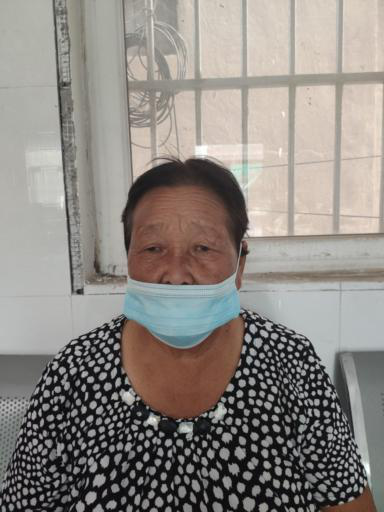

In [43]:
transforms.ToPILImage()(img_data[0])

In [79]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        #input = 3, output = 6, kernal = 5
        self.conv1 = nn.Conv2d(3, 5, 5)
        #kernal = 2, stride = 2, padding = 0 (default)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(5, 16, 5)
        #input feature, output feature
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
# 값 계산
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        print('1!!!')
        x = self.pool(F.relu(self.conv2(x)))
        print('2!!!')
        x = x.view(-1, 16 * 5 * 5)
        print('3!!!')
        x = F.relu(self.fc1(x))
        print('4!!!')
        x = F.relu(self.fc2(x))
        print('5!!!')
        x = self.fc3(x)
        print(x[0])
        return x


In [80]:
net = Net()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [82]:
for epoch in range(2): #데이터셋 2번 받기
    running_loss = 0.0
    for i, data in enumerate(Dataloader_CDataset, 0):
        # 입력 받기 (데이터 [입력, 라벨(정답)]으로 이루어짐)
        inputs, labels = data
        #학습
        optimizer.zero_grad()
        outputs = net(inputs)
        print(outputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        # 결과 출력
        running_loss += loss.item()
        if i % 2000 == 1999: # print every 2000개마다
            print('[%d, %5d] loss: %.3f' %(epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')
#PATH = './cifar_net.pth'
#torch.save(net.state_dict(), PATH)


1!!!
2!!!
3!!!


RuntimeError: DataLoader worker (pid 20516) is killed by signal: Bus error. It is possible that dataloader's workers are out of shared memory. Please try to raise your shared memory limit.

In [ ]:
class ResNet(nn.Module):
    def __init__(
        self,
        block: Type[Union[BasicBlock, Bottleneck]],
        layers: List[int],
        num_classes: int = 1000,
        zero_init_residual: bool = False,
        norm_layer: Optional[Callable[..., nn.Module]] = None
    ) -> None:
        super(ResNet, self).__init__()
        if norm_layer is None:
            norm_layer = nn.BatchNorm2d
        self._norm_layer = norm_layer  # batch norm layer

        self.inplanes = 64  # input shape
        self.dilation = 1  # dilation fixed
        self.groups = 1  # groups fixed
        
        # input block
        self.conv1 = nn.Conv2d(3, self.inplanes, kernel_size=7, stride=2, padding=3,
                               bias=False)
        self.bn1 = norm_layer(self.inplanes)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        # residual blocks
        self.layer1 = self._make_layer(block, 64, layers[0])
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2,
                                       dilate=False)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2,
                                       dilate=False)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2,
                                       dilate=False)
        self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
        self.fc = nn.Linear(512, num_classes)

        
        # weight initialization
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
            elif isinstance(m, (nn.BatchNorm2d, nn.GroupNorm)):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

        # Zero-initialize the last BN in each residual branch,
        # so that the residual branch starts with zeros, and each residual block behaves like an identity.
        # This improves the model by 0.2~0.3% according to https://arxiv.org/abs/1706.02677
        if zero_init_residual:
            for m in self.modules():
                if isinstance(m, Bottleneck):
                    nn.init.constant_(m.bn3.weight, 0)  # type: ignore[arg-type]
                elif isinstance(m, BasicBlock):
                    nn.init.constant_(m.bn2.weight, 0)  # type: ignore[arg-type]

    def _make_layer(self, block: Type[Union[BasicBlock, Bottleneck]], planes: int, blocks: int,
                    stride: int = 1, dilate: bool = False) -> nn.Sequential:
        norm_layer = self._norm_layer
        downsample = None
        
        # downsampling 필요할경우 downsample layer 생성
        if stride != 1 or self.inplanes != planes:  
            downsample = nn.Sequential(
                conv1x1(self.inplanes, planes, stride),
                norm_layer(planes),
            )

        layers = []
        layers.append(block(self.inplanes, planes, stride, downsample, self.groups,
                            self.dilation, norm_layer))
        self.inplanes = planes
        for _ in range(1, blocks):
            layers.append(block(self.inplanes, planes, groups=self.groups,
                                 dilation=self.dilation,
                                norm_layer=norm_layer))

        return nn.Sequential(*layers)

    def forward(self, x: Tensor) -> Tensor:
        print('input shape:', x.shape)
        x = self.conv1(x)
        print('conv1 shape:', x.shape)
        x = self.bn1(x)
        print('bn1 shape:', x.shape)
        x = self.relu(x)
        print('relu shape:', x.shape)
        x = self.maxpool(x)
        print('maxpool shape:', x.shape)

        x = self.layer1(x)
        print('layer1 shape:', x.shape)
        x = self.layer2(x)
        print('layer2 shape:', x.shape)
        x = self.layer3(x)
        print('layer3 shape:', x.shape)
        x = self.layer4(x)
        print('layer4 shape:', x.shape)

        x = self.avgpool(x)
        print('avgpool shape:', x.shape)
        x = torch.flatten(x, 1)
        print('flatten shape:', x.shape)
        x = self.fc(x)
        print('fc shape:', x.shape)

        return x

In [84]:
img_data[0]

tensor([[[0.6745, 0.6745, 0.6745,  ..., 0.7529, 0.7451, 0.7490],
         [0.6745, 0.6745, 0.6745,  ..., 0.7608, 0.7569, 0.7647],
         [0.6745, 0.6745, 0.6745,  ..., 0.7686, 0.7647, 0.7725],
         ...,
         [0.0745, 0.1882, 0.4745,  ..., 0.3882, 0.3961, 0.3922],
         [0.1216, 0.1843, 0.4863,  ..., 0.3843, 0.3922, 0.3843],
         [0.1333, 0.1725, 0.4941,  ..., 0.3843, 0.3922, 0.3843]],

        [[0.6784, 0.6784, 0.6784,  ..., 0.7059, 0.6980, 0.7020],
         [0.6784, 0.6784, 0.6784,  ..., 0.7137, 0.7098, 0.7176],
         [0.6784, 0.6784, 0.6784,  ..., 0.7216, 0.7176, 0.7255],
         ...,
         [0.0784, 0.1922, 0.4784,  ..., 0.4510, 0.4627, 0.4588],
         [0.1373, 0.2000, 0.5020,  ..., 0.4471, 0.4588, 0.4510],
         [0.1490, 0.1882, 0.5098,  ..., 0.4471, 0.4588, 0.4510]],

        [[0.6471, 0.6471, 0.6471,  ..., 0.6588, 0.6510, 0.6549],
         [0.6471, 0.6471, 0.6471,  ..., 0.6667, 0.6627, 0.6706],
         [0.6471, 0.6471, 0.6471,  ..., 0.6745, 0.6706, 0.

In [445]:
class TRAIN_CDataset(Dataset):
    def __init__(self,train=True):
        self.df = pd.read_csv('./train_label3.csv')
        #self.X = Image.open('./images/' + self.df.loc[idx]['path'] + '/' + self.df.loc[idx]['fname'])
        #self.y = self.df.loc[idx]['label']
        #self.d_idx = d_index
    def __len__(self):
        return len(self.df)
    def __getitem__(self,idx):
        #data_index = self.d_idx
        X = Image.open('./images/' + self.df.loc[idx]['path'] + '/' + self.df.loc[idx]['fname'])
        #X = transforms.CenterCrop(270)(X)
        y = self.df.loc[idx]['label'] 
        #print(y)
        X = transforms.ToTensor()(X)
        y = torch.tensor(y)
        return X,y

In [446]:
class TEST_CDataset(Dataset):
    def __init__(self,train=True):
        self.df = pd.read_csv('./test_label3.csv')
        #self.X = Image.open('./images/' + self.df.loc[idx]['path'] + '/' + self.df.loc[idx]['fname'])
        #self.y = self.df.loc[idx]['label']
        #self.d_idx = d_index
    def __len__(self):
        return len(self.df)
    def __getitem__(self,idx):
        #data_index = self.d_idx
        X = Image.open('./images/' + self.df.loc[idx]['path'] + '/' + self.df.loc[idx]['fname'])
        #X = transforms.CenterCrop(270)(X)
        y = self.df.loc[idx]['label'] 
        #print(y)
        X = transforms.ToTensor()(X)
        y = torch.tensor(y)
        return X,y

In [447]:
train_ds = TRAIN_CDataset(train=True)
test_ds = TEST_CDataset(train=False)

In [448]:
train_dl = DataLoader(train_ds,
                      batch_size=16,
                      shuffle=True,
                      num_workers=2,
                     drop_last=True)
test_dl = DataLoader(test_ds,
                     batch_size=16,
                     shuffle=True,
                     num_workers=2,
                    drop_last=True)

In [420]:
class BasicBlock(nn.Module):
    expansion = 1
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.residual_function = nn.Sequential(nn.Conv2d(in_channels, out_channels,kernel_size=3,
                                                         stride=stride, padding=1, bias=False),
                                               nn.BatchNorm2d(out_channels),
                                               nn.ReLU(),
                                               nn.Conv2d(out_channels, out_channels * BasicBlock.expansion,
                                                         kernel_size=3, stride=1, padding=1, bias=False),
                                               nn.BatchNorm2d(out_channels * BasicBlock.expansion),)
        self.shortcut = nn.Sequential()
        self.relu = nn.ReLU()
        
        if stride != 1 or in_channels != BasicBlock.expansion * out_channels:
            self.shortcut = nn.Sequential(nn.Conv2d(in_channels, out_channels * BasicBlock.expansion,
                                                    kernel_size=1, stride=stride, bias=False),
                                          nn.BatchNorm2d(out_channels * BasicBlock.expansion))
    def forward(self,x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        return x

In [421]:
class BottleNeck(nn.Module):
    expansion = 4
    def __init__(self, in_channels, out_channels, stride=1):
        super().__init__()
        self.residual_function = nn.Sequential(nn.Conv2d(in_channels, out_channels, kernel_size=1,
                                                         stride=1,bias=False),
                                               nn.BatchNorm2d(out_channels),
                                               nn.ReLU(),
                                               nn.Conv2d(out_channels, out_channels, kernel_size=3,
                                                         stride=stride, padding=1, bias=False),
                                               nn.BatchNorm2d(out_channels),
                                               nn.ReLU(),
                                               nn.Conv2d(out_channels, out_channels * BottleNeck.expansion,
                                                         kernel_size=1, stride=1, bias=False),
                                               nn.BatchNorm2d(out_channels * BottleNeck.expansion),)
        self.shortcut = nn.Sequential()
        self.relu = nn.ReLU()
        
        if stride != 1 or in_channels != out_channels * BottleNeck.expansion:
            self.shortcut = nn.Sequential(nn.Conv2d(in_channels, out_channels * BottleNeck.expansion,
                                                     kernel_size=1, stride=stride, bias=False),
                                           nn.BatchNorm2d(out_channels * BottleNeck.expansion))
            
    def forward(self,x):
        x = self.residual_function(x) + self.shortcut(x)
        x = self.relu(x)
        
        return x

In [422]:
class ResNet(nn.Module):
    def __init__(self, block, num_block, num_classes=18, init_weights=True):
        super().__init__()

        self.in_channels=64

        self.conv1 = nn.Sequential(
            nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        )

        self.conv2_x = self._make_layer(block, 64, num_block[0], 1)
        self.conv3_x = self._make_layer(block, 128, num_block[1], 2)
        self.conv4_x = self._make_layer(block, 256, num_block[2], 2)
        self.conv5_x = self._make_layer(block, 512, num_block[3], 2)

        self.avg_pool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)

        # weights inittialization
        if init_weights:
            self._initialize_weights()

    def _make_layer(self, block, out_channels, num_blocks, stride):
        strides = [stride] + [1] * (num_blocks - 1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_channels, out_channels, stride))
            self.in_channels = out_channels * block.expansion

        return nn.Sequential(*layers)

    def forward(self,x):
        output = self.conv1(x)
        output = self.conv2_x(output)
        x = self.conv3_x(output)
        x = self.conv4_x(x)
        x = self.conv5_x(x)
        x = self.avg_pool(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

    # define weight initialization function
    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Conv2d):
                nn.init.kaiming_normal_(m.weight, mode='fan_out', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm2d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.Linear):
                nn.init.normal_(m.weight, 0, 0.01)
                nn.init.constant_(m.bias, 0)

In [423]:
def resnet18():
    return ResNet(BasicBlock, [2,2,2,2])
def resnet34():
    return ResNet(BasicBlock, [3,4,6,3])
def resnet50():
    return ResNet(BottleNeck, [3,4,6,3])
def resnet101():
    return ResNet(BottleNeck, [3,4,23,3])
def resnet152():
    return ResNet(BottleNeck, [3,8,36,3])

In [424]:
device = torch.device('cuda')

In [425]:
model = resnet50().to(device)
x = torch.randn(3,3,244,244).to(device)
output = model(x)
print(output.size())

torch.Size([3, 18])


In [426]:
loss_func = nn.CrossEntropyLoss(reduction='sum')
opt = optim.Adam(model.parameters(), lr=0.001)

from torch.optim.lr_scheduler import ReduceLROnPlateau
lr_scheduler = ReduceLROnPlateau(opt, mode='min', factor=0.1, patience=10)

In [427]:
def get_lr(opt):
    for param_group in opt.param_groups:
        return param_group['lr']

In [428]:
def metric_batch(output, target):
    pred = output.argmax(1, keepdim=True)
    corrects = pred.eq(target.view_as(pred)).sum().item()
    return corrects

def loss_batch(loss_func, output, target, opt=None):
    loss = loss_func(output, target)
    metric_b = metric_batch(output, target)
    
    if opt is not None:
        opt.zero_grad()
        loss.backward()
        opt.step()
        
    return loss.item(), metric_b

In [429]:
def loss_epoch(model, loss_func, dataset_dl, sanity_check=False, opt=None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len(dataset_dl.dataset)

    for xb, yb in dataset_dl:
        xb = xb.to(device)

        yb = yb.to(device)

        output = model(xb)


        loss_b, metric_b = loss_batch(loss_func, output, yb, opt)

        running_loss += loss_b
        
        if metric_b is not None:
            running_metric += metric_b
        
        if sanity_check is True:
            break

    loss = running_loss / len_data
    metric = running_metric / len_data

    return loss, metric

In [430]:
def train_val(model, params):
    num_epochs=params['num_epochs']
    loss_func=params["loss_func"]
    opt=params["optimizer"]
    train_dl=params["train_dl"]
    test_dl=params["test_dl"]
    sanity_check=params["sanity_check"]
    lr_scheduler=params["lr_scheduler"]
    path2weights=params["path2weights"]

    loss_history = {'train': [], 'val': []}
    metric_history = {'train': [], 'val': []}

    # # GPU out of memoty error
    # best_model_wts = copy.deepcopy(model.state_dict())

    best_loss = float('inf')

    start_time = time.time()

    for epoch in range(num_epochs):
        current_lr = get_lr(opt)
        print('Epoch {}/{}, current lr={}'.format(epoch, num_epochs-1, current_lr))

        model.train()
        train_loss, train_metric = loss_epoch(model, loss_func, train_dl, sanity_check, opt)
        loss_history['train'].append(train_loss)
        metric_history['train'].append(train_metric)

        model.eval()
        with torch.no_grad():
            val_loss, val_metric = loss_epoch(model, loss_func, test_dl, sanity_check)
        loss_history['val'].append(val_loss)
        metric_history['val'].append(val_metric)

        if val_loss < best_loss:
            best_loss = val_loss
            # best_model_wts = copy.deepcopy(model.state_dict())

            # torch.save(model.state_dict(), path2weights)
            # print('Copied best model weights!')
            print('Get best val_loss')

        lr_scheduler.step(val_loss)

        print('train loss: %.6f, val loss: %.6f, accuracy: %.2f, time: %.4f min' %(train_loss, val_loss, 100*val_metric, (time.time()-start_time)/60))
        print('-'*10)

    # model.load_state_dict(best_model_wts)

    return model, loss_history, metric_history

In [439]:
# definc the training parameters
params_train = {
    'num_epochs':25,
    'optimizer':opt,
    'loss_func':loss_func,
    'train_dl':train_dl,
    'test_dl':test_dl,
    'sanity_check':False,
    'lr_scheduler':lr_scheduler,
    'path2weights':'./weights.pt',
}

# create the directory that stores weights.pt
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSerror:
        print('Error')
createFolder('./models')

In [432]:
test_dir = '/opt/ml/input/data/eval'
class Submission_Dataset(Dataset):
    def __init__(self,subm_path):
        self.subm_path = subm_path
        self.df = pd.read_csv(os.path.join(self.subm_path,'info.csv'))
    def __len__(self):
        return len(self.df)
    def __getitem__(self,idx):
        X = Image.open(self.subm_path + '/images/' + self.df.loc[idx]['ImageID'])
        X = transforms.ToTensor()(X)
        return X

In [440]:
ex_subm_dataset = Submission_Dataset(test_dir)
ex_subm_dl = DataLoader(ex_subm_dataset,
                        shuffle=False)

In [450]:
a=1

In [ ]:
model, loss_hist, metric_hist = train_val(model, params_train)

print('***'*10)
print('*#*'*10)
print('***'*10)

all_predictions = []
for images in ex_subm_dl:
    with torch.no_grad():
        images = images.to(device)
        pred = model(images)
        pred = pred.argmax(dim=-1)
        all_predictions.extend(pred.cpu().numpy())
submission['ans'] = all_predictions

# 제출할 파일을 저장합니다.
submission.to_csv(os.path.join(test_dir, 'submission6.csv'), index=False)
print('test inference is done!')

Epoch 0/24, current lr=1e-05
Get best val_loss
train loss: 0.006695, val loss: 0.160751, accuracy: 94.90, time: 3.8222 min
----------
Epoch 1/24, current lr=1e-05
train loss: 0.006738, val loss: 0.176428, accuracy: 94.60, time: 7.6227 min
----------
Epoch 2/24, current lr=1.0000000000000002e-06
Get best val_loss
train loss: 0.007202, val loss: 0.156691, accuracy: 95.10, time: 11.4181 min
----------
Epoch 3/24, current lr=1.0000000000000002e-06
train loss: 0.008270, val loss: 0.158330, accuracy: 94.79, time: 15.2174 min
----------
Epoch 4/24, current lr=1.0000000000000002e-06
Get best val_loss
train loss: 0.005154, val loss: 0.148509, accuracy: 95.35, time: 19.0239 min
----------
Epoch 5/24, current lr=1.0000000000000002e-06
train loss: 0.008495, val loss: 0.159690, accuracy: 94.73, time: 22.8360 min
----------
Epoch 6/24, current lr=1.0000000000000002e-06
Get best val_loss
train loss: 0.006919, val loss: 0.140891, accuracy: 95.29, time: 26.6359 min
----------
Epoch 7/24, current lr=1.0

In [444]:
all_predictions = []
for images in ex_subm_dl:
    with torch.no_grad():
        images = images.to(device)
        pred = model(images)
        pred = pred.argmax(dim=-1)
        all_predictions.extend(pred.cpu().numpy())
submission['ans'] = all_predictions

# 제출할 파일을 저장합니다.
submission.to_csv(os.path.join(test_dir, 'submission5.csv'), index=False)
print('test inference is done!')

test inference is done!


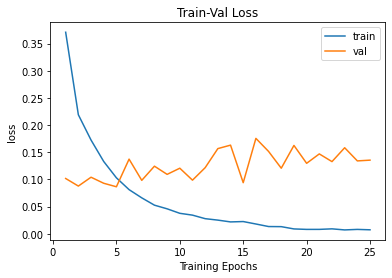

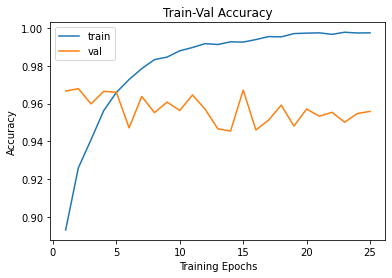

In [442]:
num_epochs = params_train['num_epochs']

plt.title('Train-Val Loss')
plt.plot(range(1,num_epochs+1), loss_hist['train'], label='train')
plt.plot(range(1,num_epochs+1), loss_hist['val'], label='val')
plt.ylabel('loss')
plt.xlabel('Training Epochs')
plt.legend()
plt.show()

plt.title('Train-Val Accuracy')
plt.plot(range(1,num_epochs+1), metric_hist['train'], label='train')
plt.plot(range(1,num_epochs+1), metric_hist['val'], label='val')
plt.ylabel('Accuracy')
plt.xlabel('Training Epochs')
plt.legend()
plt.show()

In [443]:
from sklearn.metrics import f1_score

In [ ]:
for epoch in range(1,EPOCHS

In [337]:
from torchvision.transforms import Resize, ToTensor, Normalize

In [328]:
test_dir = '/opt/ml/input/data/eval'

In [408]:
class Submission_Dataset(Dataset):
    def __init__(self,subm_path):
        self.subm_path = subm_path
        self.df = pd.read_csv(os.path.join(self.subm_path,'info.csv'))
    def __len__(self):
        return len(self.df)
    def __getitem__(self,idx):
        X = Image.open(self.subm_path + '/images/' + self.df.loc[idx]['ImageID'])
        X = transforms.ToTensor()(X)
        return X

In [410]:
ex_subm_dataset = Submission_Dataset(test_dir)
ex_subm_dl = DataLoader(ex_subm_dataset,
                        shuffle=False)

In [330]:
class TestDataset(Dataset):
    def __init__(self, img_paths, transform):
        self.img_paths = img_paths
        self.transform = transform

    def __getitem__(self, index):
        image = Image.open(self.img_paths[index])

        if self.transform:
            image = self.transform(image)
        return image

    def __len__(self):
        return len(self.img_paths)

In [331]:
submission = pd.read_csv(os.path.join(test_dir, 'info.csv'))
image_dir = os.path.join(test_dir, 'images')

In [397]:
submission

,ImageID,ans
0,cbc5c6e168e63498590db46022617123f1fe1268.jpg,3
1,0e72482bf56b3581c081f7da2a6180b8792c7089.jpg,3
2,b549040c49190cedc41327748aeb197c1670f14d.jpg,0
3,4f9cb2a045c6d5b9e50ad3459ea7b791eb6e18bc.jpg,0
4,248428d9a4a5b6229a7081c32851b90cb8d38d0c.jpg,3
...,...,...
12595,d71d4570505d6af8f777690e63edfa8d85ea4476.jpg,3
12596,6cf1300e8e218716728d5820c0bab553306c2cfd.jpg,3
12597,8140edbba31c3a824e817e6d5fb95343199e2387.jpg,3
12598,030d439efe6fb5a7bafda45a393fc19f2bf57f54.jpg,3


In [334]:
image_paths = [os.path.join(image_dir, img_id) for img_id in submission.ImageID]

In [338]:
image_paths = [os.path.join(image_dir, img_id) for img_id in submission.ImageID]
transform = transforms.Compose([
    Resize((512, 384), Image.BILINEAR),
    ToTensor(),
    Normalize(mean=(0.5, 0.5, 0.5), std=(0.2, 0.2, 0.2)),
])
dataset = TestDataset(image_paths, transform)

loader = DataLoader(
    dataset,
    shuffle=False
)

In [396]:
a = loader
next(iter(a))

tensor([[[[ 1.2843,  1.6373,  1.1863,  ..., -1.4216, -1.5196, -1.6373],
          [ 0.0098, -0.2647, -0.6961,  ..., -1.5196, -1.5784, -1.6569],
          [-0.7941, -1.2255, -0.9118,  ..., -1.6176, -1.6176, -1.6373],
          ...,
          [-2.0490, -2.0490, -2.0490,  ..., -1.7745, -1.7745, -1.6569],
          [-2.0490, -2.0490, -2.0294,  ..., -1.7941, -1.8922, -1.8333],
          [-1.9902, -1.9902, -1.9706,  ..., -1.8529, -2.0882, -2.0490]],

         [[ 1.4412,  1.7941,  1.3627,  ..., -1.3824, -1.4804, -1.5980],
          [ 0.1667, -0.1078, -0.5196,  ..., -1.4804, -1.5392, -1.6176],
          [-0.6373, -1.0686, -0.7353,  ..., -1.5784, -1.5784, -1.5980],
          ...,
          [-1.9706, -1.9706, -1.9706,  ..., -1.6961, -1.6961, -1.5784],
          [-1.9706, -1.9706, -1.9510,  ..., -1.7157, -1.8137, -1.7549],
          [-1.9118, -1.9118, -1.8922,  ..., -1.7745, -2.0098, -1.9706]],

         [[ 1.4804,  1.8333,  1.3431,  ..., -1.5980, -1.6961, -1.8137],
          [ 0.2059, -0.0686, -

In [391]:
device = torch.device('cuda')
#model.eval()

In [340]:
all_predictions = []
for images in loader:
    with torch.no_grad():
        images = images.to(device)
        pred = model(images)
        pred = pred.argmax(dim=-1)
        all_predictions.extend(pred.cpu().numpy())
submission['ans'] = all_predictions

# 제출할 파일을 저장합니다.
submission.to_csv(os.path.join(test_dir, 'submission2.csv'), index=False)
print('test inference is done!')

test inference is done!
